## Part 1. Description of more realistic dataset (Old dataset)

Written by Sundong Kim (sundong.kim@kaist.ac.kr), Jan 18th, 2019,

In this notebook, we introduce the description of our previous dataset. (ICDM, KAIS)

* First, we briefly introduce how to generate the new dataset.
    * Step 1: http://143.248.84.89:8888/notebooks/revisit/notebook_prepare_open_dataset/Preparing-open-dataset_step1_store_A.ipynb
    * Step 2: http://143.248.84.89:8888/notebooks/revisit/notebook_prepare_open_dataset/Preparing-open-dataset_step2_store_A.ipynb
* Second, we show brief statistics of the new dataset.
* Third, we show the difference between train/test ratio of our old dataset and our new dataset and compare between two dataset according to realistic prediction setting.

In [1]:
import pandas as pd
import numpy as np
import os
import random
from matplotlib import pyplot as plt
%matplotlib inline
import string
import sys
from random import shuffle
sys.path.append('../../MSRA_proposal_wifi_log/code/')

In [2]:
def chunks(l, n, k):
	"""
	Yield successive n-sized chunks from l - Used to cut IDs into n folds.
	"""
	idx = 0
	for i in range(0, len(l), n):
		if idx < k:
			r = l[i:i + n]
			m = list(set(l)-set(r))
			yield m, r
		else:
			pass
		idx += 1

In [3]:
# In this tutorial, we will use a store_A dataset. 
# Load an original 319 (L_GA) dataset (= store A)
df_all = pd.read_pickle('../../MSRA_proposal_wifi_log/data/zoyi/20180111/experiment/1143_3_revisit_intention_added.p')

# Randomly select IDs into subgroups (5-fold)
ids = list(set(df_all['device_id']))
shuffle(ids)
ids = chunks(ids, round(len(ids)/5), 5)
# For tracking an experiment ID - generate random 10-digit chars for each exp
expID = ''.join(random.choices(string.ascii_uppercase + string.digits, k=10))

In [4]:
# Consider only the 1st fold for data description, since the tendency might look similar
idset = next(ids)

print('Uniq # ID in train:', len(idset[0]), ' Uniq # ID in test:', len(idset[1]))  
# Divide train/test by users
df_train = df_all[df_all['device_id'].isin(idset[0])]
df_test = df_all[df_all['device_id'].isin(idset[1])]

Uniq # ID in train: 852642  Uniq # ID in test: 213161


In [5]:
df_train.head(1)

date_device_id                 traj  \
1928  16776_002a1bfebfc9f103ee7aa0ef56d52d91  [1f-enter, 1f-must]   

                                  ts dwell_time  \
1928  [1449485736664, 1449485739559]   [53, 50]   

                              ts_end                         device_id   date  \
1928  [1449485789664, 1449485789559]  002a1bfebfc9f103ee7aa0ef56d52d91  16776   

      total_visit_count  total_daily_visit_count  revisit_interval  \
1928                  1                        1               NaN   

      revisit_intention  
1928                  0

In [6]:
# # Downsampling binary revisit intention label (RV_bin)
# train_balanced = preprocessing.label_balancing(df_train, 'revisit_intention_x')
# test_balanced = preprocessing.label_balancing(df_test, 'revisit_intention_x')

train_labels = df_train[['device_id','revisit_interval','revisit_intention']]
test_labels = df_test[['device_id','revisit_interval','revisit_intention']]

train_labels['revisit_interval'] /= (86400*1000)
test_labels['revisit_interval'] /= (86400*1000)

# train_visits = pd.read_csv(pre_release_path+'train_visits.tsv', sep='\t')
# test_visits = pd.read_csv(pre_release_path+'test_visits.tsv', sep='\t')
# wifi_sessions = pd.read_csv(pre_release_path+'wifi_sessions.tsv', sep='\t')

/home/dmlab/ksedm1/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/dmlab/ksedm1/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


### 1. Exploring dataset

In [7]:
train_labels.head(5)

device_id  revisit_interval  revisit_intention
1928   002a1bfebfc9f103ee7aa0ef56d52d91               NaN                  0
3932   0056499974b2b57922b40d070d0b6c5f          2.250606                  1
4163   005c8000cf69557867bdce150b414879          0.972980                  1
4994   006fd5351e6692542570646105392623         47.760917                  1
10124  00f3ef308b4e9c725965ea9c83f45188               NaN                  0

In [8]:
test_labels.head(5)

device_id  revisit_interval  revisit_intention
2637   003d29a8c5c170cfc2ee2effd1c08c3d               NaN                  0
8449   00c77a625d17ec604d2af56654fd459a               NaN                  0
12485  012979136a81f1b4c5c09d49d08a76db        271.245700                  1
15736  0175289b5abec358944839626e9295f7         72.096433                  1
19380  01cb8c6eb5cce79493be0c6e04e5c9ec               NaN                  0

**Some statistics**

In [9]:
# Number of unique users

print(len(train_labels),len(test_labels))

1607627 400757


In [10]:
# Number of unique users

len(set(train_labels.device_id)), len(set(test_labels.device_id)) 

(852642, 213161)

In [11]:
# Revisit ratio ==  Main difference (Here we cut by customer, not considering time - so the ratio between train/test are similar.)

print(train_labels.revisit_intention.value_counts())
print()
print(test_labels.revisit_intention.value_counts())
print('Revisit ratio of training dataset is {:.3f}, test dataset is {:.3f}'.format(sum(train_labels.revisit_intention)/len(train_labels.revisit_intention),
                                                                               sum(test_labels.revisit_intention)/len(test_labels.revisit_intention)))

0    823686
1    783941
Name: revisit_intention, dtype: int64

0    205999
1    194758
Name: revisit_intention, dtype: int64
Revisit ratio of training dataset is 0.488, test dataset is 0.486


Mean revisit interval of training dataset is 47.531, test dataset is 47.626


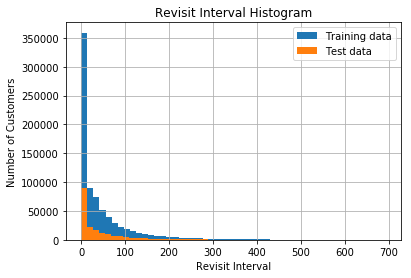

In [12]:
# Revisit interval - train data - among users who revisit
train_labels.revisit_interval.hist(bins=50)

# Revisit interval - test data - among users who revisit
test_labels.revisit_interval.hist(bins=50)

plt.xlabel('Revisit Interval')
plt.ylabel('Number of Customers')
plt.title('Revisit Interval Histogram')
plt.legend(['Training data','Test data'])

print('Mean revisit interval of training dataset is {:.3f}, test dataset is {:.3f}'.format(np.mean(train_labels.revisit_interval), np.mean(test_labels.revisit_interval)))

In [13]:
# relative date to actual date example
from datetime import date, timedelta

d0 = date(1970, 1, 1)
delta = 14141
print(d0+timedelta(days=17167))

2017-01-01


We only deal with the first visits for prediction, that's why the number of customers decrease. Otherwise, the dataset suffers from leakage.


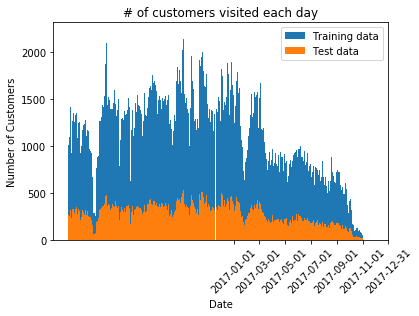

In [14]:
train_data = pd.concat([df_train[['date']], train_labels[['revisit_interval','revisit_intention']]], axis=1)
train_data['date_str'] = train_data['date'].apply(lambda x: date(1970,1,1)+timedelta(days=x))
train_data1 = train_data[train_data.revisit_intention==1]
plt.hist(train_data1.date, bins=max(train_data.date)-min(train_data.date)+1)[2]
plt.title('# of customers visited each day');

test_data = pd.concat([df_test[['date']], test_labels[['revisit_interval','revisit_intention']]], axis=1)
test_data1 = test_data[test_data.revisit_intention==1]
plt.hist(test_data1.date, bins=max(test_data.date)-min(test_data.date)+1)[2]
xdate = [17167,17226,17287,17348,17410,17471,17531]
xlabel = [date(1970,1,1)+timedelta(days=x) for x in xdate]
plt.xticks(xdate, xlabel, rotation='45')
plt.title('# of customers visited each day');
plt.xlabel('Date');
plt.ylabel('Number of Customers');
plt.legend(['Training data', 'Test data']);
print('We only deal with the first visits for prediction, that\'s why the number of customers decrease. Otherwise, the dataset suffers from leakage.')

Corresponding part


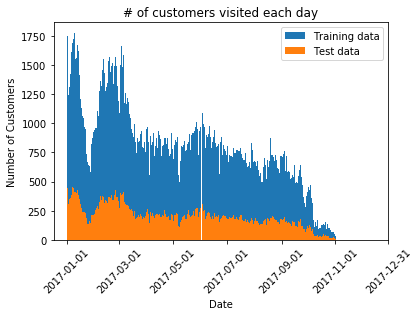

In [15]:
plt.hist(train_data1[train_data1.date >= 17167].date, bins=max(train_data[train_data.date >= 17167].date)-min(train_data[train_data.date >= 17167].date)+1)[2]
plt.title('# of customers visited each day');
plt.hist(test_data1[test_data1.date >= 17167].date, bins=max(test_data[test_data.date >= 17167].date)-min(test_data[test_data.date >= 17167].date)+1)[2]
xdate = [17167,17226,17287,17348,17410,17471,17531]
xlabel = [date(1970,1,1)+timedelta(days=x) for x in xdate]
plt.xticks(xdate, xlabel, rotation='45')
plt.title('# of customers visited each day');
plt.xlabel('Date');
plt.ylabel('Number of Customers');
plt.legend(['Training data', 'Test data']);
print('Corresponding part')

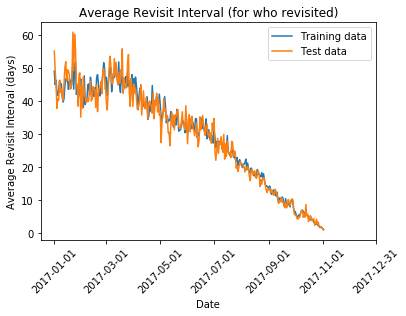

In [16]:
train_data1[train_data1.date >= 17167].groupby(['date'])['revisit_interval'].mean().plot()
test_data1[test_data1.date >= 17167].groupby(['date'])['revisit_interval'].mean().plot()

xdate = [17167,17226,17287,17348,17410,17471,17531]
xlabel = [date(1970,1,1)+timedelta(days=x) for x in xdate]
plt.xticks(xdate, xlabel, rotation='45')
plt.title('Average Revisit Interval (for who revisited)');
plt.xlabel('Date');
plt.ylabel('Average Revisit Interval (days)');
plt.legend(['Training data', 'Test data']);

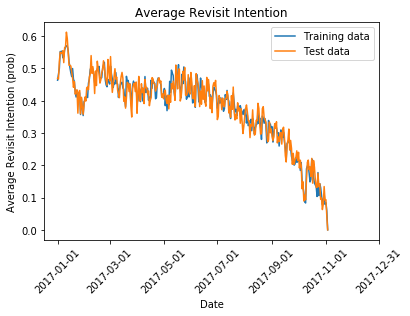

In [17]:
train_data[train_data.date >= 17167].groupby(['date'])['revisit_intention'].mean().plot()
test_data[test_data.date >= 17167].groupby(['date'])['revisit_intention'].mean().plot()

xdate = [17167,17226,17287,17348,17410,17471,17531]
xlabel = [date(1970,1,1)+timedelta(days=x) for x in xdate]
plt.xticks(xdate, xlabel, rotation='45')
plt.title('Average Revisit Intention');
plt.xlabel('Date');
plt.ylabel('Average Revisit Intention (prob)');
plt.legend(['Training data', 'Test data']);

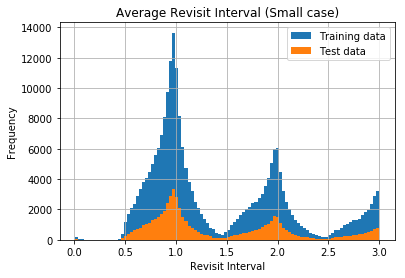

In [18]:
train_labels[train_labels.revisit_interval<3].revisit_interval.hist(bins=100)
test_labels[test_labels.revisit_interval<3].revisit_interval.hist(bins=100)
plt.title('Average Revisit Interval (Small case)');
plt.xlabel('Revisit Interval');
plt.ylabel('Frequency');
plt.legend(['Training data', 'Test data']);

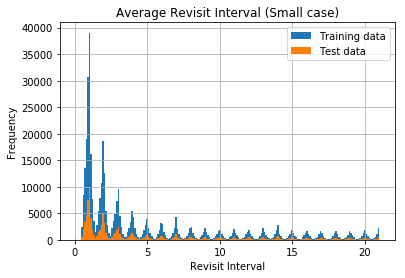

In [24]:
train_labels[train_labels.revisit_interval<21].revisit_interval.hist(bins=200)
test_labels[test_labels.revisit_interval<21].revisit_interval.hist(bins=200)
plt.title('Average Revisit Interval (Small case)');
plt.xlabel('Revisit Interval');
plt.ylabel('Frequency');
plt.legend(['Training data', 'Test data']);

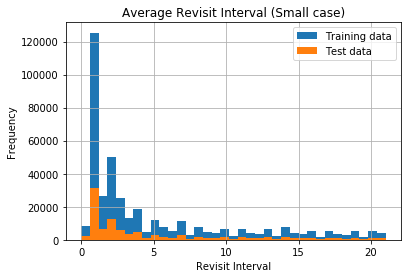

In [22]:
train_labels[train_labels.revisit_interval<21].revisit_interval.hist(bins=35)
test_labels[test_labels.revisit_interval<21].revisit_interval.hist(bins=35)
plt.title('Average Revisit Interval (Small case)');
plt.xlabel('Revisit Interval');
plt.ylabel('Frequency');
plt.legend(['Training data', 'Test data']);

In [20]:
# # Wifi session logs distribution by each month:
# #  - The number of logs from train period is larger than the number of logs from test period.
# #  - Since we only retain one indoor visit for each wifi-id in the test period.
# wifi_sessions.ts.hist(bins=12)

In [21]:
# Wifi session logs distribution by area
wifi_sessions.area.value_counts()

NameError: name 'wifi_sessions' is not defined

### 2. Feature generation

In [ ]:
# In this tutorial, we will use a store_A dataset.      # /data: 50,000 user dataset  /data_sample: 500 user sample dataset
pre_release_path = '../data/indoor/store_A/'

# Load dataset
train_labels = pd.read_csv(pre_release_path+'train_labels.tsv', sep='\t')
test_labels = pd.read_csv(pre_release_path+'test_labels.tsv', sep='\t')
train_visits = pd.read_csv(pre_release_path+'train_visits.tsv', sep='\t')
test_visits = pd.read_csv(pre_release_path+'test_visits.tsv', sep='\t')
wifi_sessions = pd.read_csv(pre_release_path+'wifi_sessions.tsv', sep='\t')

wifi_sessions = wifi_sessions.set_index('index')

In [ ]:
### Before feature engineering, querying some useful information from wifi-sessions data, and add to the dataframe.
import time
def add_infos(df):  
    tst = time.time()
    df['l_index'] = df['indices'].apply(lambda x: [int(y) for y in x.split(';')])
    t1 = time.time()
    print(t1-tst)
    
    newidx = [item for sublist in list(df.l_index) for item in sublist]
    tmpdf = wifi_sessions.loc[newidx]
    traj_lens = df.l_index.apply(len)

    tmp_areas = list(tmpdf['area'])
    tmp_dt = list(tmpdf['dwell_time'])
    tmp_ts_end = list(np.array(tmpdf['ts'])+np.array(tmp_dt))  # end time
    
    rslt_dt = []
    rslt_areas = []
    rslt_ts_end = []
    
    i = 0
    for x in traj_lens:
        rslt_dt.append(tmp_dt[i:i+x])
        rslt_areas.append(tmp_areas[i:i+x])
        rslt_ts_end.append(max(tmp_ts_end[i:i+x]))
        i += x
        
    df['dwell_times'] = rslt_dt
    df['areas'] =  rslt_areas
    df['ts_end'] = rslt_ts_end
    
    t2 = time.time()
    print(t2-t1)
    return df 
    
##### Very slow approach, so revised.    
#     df['dwell_times'] = df['l_index'].apply(lambda x: [wifi_sessions.loc[idx]['dwell_time'] for idx in x])
#     t2 = time.time()
#     print(t2-t1)
#     df['areas'] = df['l_index'].apply(lambda x: [wifi_sessions.loc[idx]['area'] for idx in x])
#     t3 = time.time()
#     print(t3-t2)
    return df

In [ ]:
train_visits = add_infos(train_visits)
test_visits = add_infos(test_visits)

In [ ]:
train_visits.dwell_times.head(3)

In [ ]:
### Sample code to generate features 

def statistical_feature_generator(x):
    fs = []

    total_dwell_time = sum(x['dwell_times'])   # total dwell time
    num_area_trajectory_have = len(x['dwell_times'])  # the number of area
    num_unique_area_sensed = len(set(x['areas']))  # the number of unique areas
    
    fs.append(total_dwell_time)
    fs.append(num_area_trajectory_have)  
    fs.append(num_unique_area_sensed)     
    
    return fs


def add_statistical_features(train_visits):
    df = train_visits.copy()
    
    features = df.apply(lambda x: statistical_feature_generator(x), axis=1)
    featureName = ['total_dwell_time', 'num_area', 'num_unique_area']
    
    fdf = pd.DataFrame(list(np.asarray(features)), index=features.index, columns = featureName)
    
    # Combine feature values to the dataframe
    df = pd.concat([df, fdf], axis=1)
    del fdf
    
    return df

In [ ]:
train_visits = add_statistical_features(train_visits)
test_visits = add_statistical_features(test_visits)

In [ ]:
train_visits['date_rel'] = train_visits['date']-min(train_visits.date)
test_visits['date_rel'] = test_visits['date']-min(train_visits.date)

In [ ]:
train_visits.head(3)

### 3. Revisit Prediction (Binary classification)

In [ ]:
import time
import xgboost as xgb
from sklearn import metrics
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

def show_intention_classification_result(y_pred, y_test):
    return metrics.accuracy_score(y_test, y_pred)

def show_interval_regression_result(y_pred, y_test):
    return metrics.mean_squared_error(y_test, y_pred)

Downsampling for measuring binary classification accuracy

In [ ]:
df_train = pd.concat([train_visits, train_labels[['revisit_intention','revisit_interval']]], axis=1)
df_test = pd.concat([test_visits, test_labels[['revisit_intention','revisit_interval']]], axis=1)

In [ ]:
## Generate 'suppress_time' column for evaluation
def generate_suppress_time_col(df):
    last_ts_end = max(df['ts_end'])
    df['tmp_suppress_time'] = [(last_ts_end-x)/86400 for x in df['ts_end']]
    df['suppress_time'] = np.maximum(df['revisit_interval'].fillna(0), df['revisit_interval'].isnull()*df['tmp_suppress_time'])
    del df['tmp_suppress_time']
    return df
    
df_train = generate_suppress_time_col(df_train)
df_test = generate_suppress_time_col(df_test)

In [ ]:
### Retain only feature values

def remove_unnecessary_features(df):
    unnecessary_attributes = ['visit_id', 'wifi_id', 'indices', 'l_index', 'dwell_times', 'areas', 'ts_end']
    all_attributes = list(df.columns)
    for attribute in unnecessary_attributes:
        try:
            all_attributes.remove(attribute)
        except:
            pass
    df = df[all_attributes]
    return df

df_train = remove_unnecessary_features(df_train)
df_test = remove_unnecessary_features(df_test)

In [ ]:
def label_balancing(df, name_target_column):
    ## No downsampling
    return df
    
#     ## 1:1 Downsampling
#     minimum_label_num = list(df[name_target_column].value_counts())[-1]
    
#     df_list = []
#     for value in df[name_target_column].unique():
#         sub_dfs = df.loc[df[name_target_column] == value]
#         new_sub_dfs = sub_dfs.iloc[np.random.permutation(len(sub_dfs))][:minimum_label_num]  ## Random Downsampling according to smallest label size
#         df_list.append(new_sub_dfs)
#         del sub_dfs
        
#     new_df = pd.concat(df_list).sort_index()
    
#     return new_df

In [ ]:
df_train.head(3)

In [ ]:
1-sum(df_train.revisit_intention)/len(df_train.revisit_intention), 1-sum(df_test.revisit_intention)/len(df_test.revisit_intention)

In [ ]:
df_test['suppress_time'].head(5)

In [ ]:
import lifelines

print('-----------   Experiments Begin   -------------')
print()

clfs = [Pipeline([('classification', XGBClassifier(max_depth=5, learning_rate=0.1))]), 
                Pipeline([('regression', XGBRegressor(max_depth=5, learning_rate=0.1))]),
               ]

options = ['no_date', 'date']

rslt = {}
for opt in options:
    rslt[opt] = {}
    for clf in clfs:
        rslt[opt][clf] = {}
        rslt[opt][clf]['elapsed_time'] = []
        for metric in ['accuracy', 'precision_macro', 'recall_macro', 'fscore_macro', 'MSE', 'cindex']:
            rslt[opt][clf][metric] = []


## 나중에 더 정교화 (실제 cut-off point 가지고)
train_date_max = max(df_train.date)
test_date_max = max(df_test.date)
    
for i in range(2):
    for opt in ['no_date', 'date']:
        ## Making downsampled dataset for measuring binary classification accuracy - baseline = 0.5
        if opt == 'no_date':
            whole_balanced_train = label_balancing(df_train, 'revisit_intention')[df_train.columns.drop(['date','date_rel'])]
            whole_balanced_test = label_balancing(df_test, 'revisit_intention')[df_train.columns.drop(['date','date_rel'])]   
            
        if opt == 'date':
            whole_balanced_train = label_balancing(df_train, 'revisit_intention') 
            whole_balanced_test = label_balancing(df_test, 'revisit_intention')
    
        if (i == 0) and (opt == 'no_date'):
            print('Class label distribution after downsampling - Train data: revisit_intention 0: {}, 1: {}'.format(
                whole_balanced_train.revisit_intention.value_counts()[0],
                whole_balanced_train.revisit_intention.value_counts()[1]))
            print('Class label distribution after downsampling - Test data: revisit_intention 0: {}, 1: {}'.format(
                whole_balanced_test.revisit_intention.value_counts()[0],
                whole_balanced_test.revisit_intention.value_counts()[1]))


        for (train_data, test_data, ref) in [(whole_balanced_train, whole_balanced_test, 'Downsampled')]:
            train_array = np.asarray(train_data)  
            test_array = np.asarray(test_data)  

            for clf in clfs:
                if clf.steps[0][0] == 'classification':

                    # Dividing features and labels
                    X_train, y_train = train_array[:, :-3], train_array[:, -3].astype(int)
                    X_test, y_test = test_array[:, :-3], test_array[:, -3].astype(int)

                    # Training
                    start = time.time()
                    clf = clf.fit(X_train, y_train)

                    # Prediction
                    y_pred = clf.predict(X_test)

                    acc = metrics.accuracy_score(y_test, y_pred)
                    pm,rm,fm,_ = metrics.precision_recall_fscore_support(y_test, y_pred, average='macro')

                    rslt[opt][clf]['accuracy'].append(acc)
                    rslt[opt][clf]['precision_macro'].append(pm)
                    rslt[opt][clf]['recall_macro'].append(rm)
                    rslt[opt][clf]['fscore_macro'].append(fm)

                else:
                    # Dividing features and labels
                    X_train, y_train = train_array[:, :-3], train_array[:, -1]
                    X_test, y_test = test_array[:, :-3], test_array[:, -1]
                    y_test_bin = test_array[:,-3]
                    

                    # Training
                    start = time.time()
                    clf = clf.fit(X_train, y_train)

                    # Prediction
                    y_pred = clf.predict(X_test)
#                     mse = metrics.mean_squared_error(y_test, y_pred)

#                     y_test_max = max(y_test)
                    mse = metrics.mean_squared_error(y_test[y_test_bin == 1], y_pred[y_test_bin == 1])
                    
                    cindex = lifelines.utils.concordance_index(y_test, y_pred, event_observed= y_test_bin == 1 )

                    rslt[opt][clf]['MSE'].append(mse)
                    rslt[opt][clf]['cindex'].append(cindex)


                done = time.time()
                elapsed = done-start
                rslt[opt][clf]['elapsed_time'].append(elapsed)

print()
print('-----------   Performance of our model   -------------')
print()

    
for opt in options:
    print('Option: {}'.format(opt))
    for clf in clfs:
        for key in rslt[opt][clf].keys():
            if len(rslt[opt][clf][key]) > 0:
                print('Average {} (with {}): {:.4f}'.format(key, str(clf.steps[0][1])[:10], np.mean(rslt[opt][clf][key])))
    print()


In [ ]:
whole_balanced_train.tail(3)

In [ ]:
from lifelines import CoxPHFitter

# Using Cox Proportional Hazards model
cph = CoxPHFitter()
# `event_col` refers to whether the 'death' events was observed: 1 if observed, 0 else (censored)
cph.fit(whole_balanced_train[whole_balanced_train.columns.drop(['revisit_interval'])], 
        'suppress_time', event_col='revisit_intention', show_progress=False)
cph.print_summary()

In [ ]:
test_pred = cph.predict_expectation(whole_balanced_test[whole_balanced_test.columns.drop(['revisit_interval','revisit_intention','suppress_time'])])
score_test = lifelines.utils.concordance_index(whole_balanced_test['suppress_time'], test_pred[0], event_observed=whole_balanced_test['revisit_intention'])
score_test

In [ ]:
test_pred = cph.predict_median(whole_balanced_test[whole_balanced_test.columns.drop(['revisit_interval','revisit_intention','suppress_time'])])
score_test = lifelines.utils.concordance_index(whole_balanced_test['suppress_time'], test_pred[0.5], event_observed=whole_balanced_test['revisit_intention'])
score_test

In [ ]:
whole_balanced_test.head(3)   // 방문횟수같은 강한 feature 몇개 넣어보자.

In [ ]:
pd.concat([whole_balanced_test['suppress_time'], test_pred[0.5], whole_balanced_test['revisit_intention']],axis=1)

In [ ]:
## C-index test

lifelines.utils.concordance_index(np.array([1,2,3,4,5,6,7]), np.array([4,2,3,5,1,6,7]), event_observed=np.array([1,0,1,0,1,0,1]))